In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
import umap

C:\Users\noton\miniconda3\envs\ReL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("data_to_MF/smiles_list_2.csv")
made_by = pd.DataFrame(data['made_by'], columns=['made_by'])
data

,SMILES,made_by
0,CN(C)c1ccc(-c2cc(N(C)C)ccc2-c2cc(-c3cocn3)c3[n...,E
1,CN(C)c1ccc(-c2ccc(C(=O)c3cccn3C)cc2-c2c3ncoc3c...,E
2,CN(C)c1ccc(-c2cc(N(C)CN3c4ccccc4Sc4ccccc43)ccc...,E
3,CN(C)c1ccc(P(c2ccccc2)c2ccccc2-c2cc3sccc3s2)cc1,E
4,CN(C)c1ccc(-n2c3ccccc3c3cnccc32)cc1N1c2ccccc2N...,E
...,...,...
101139,CC(C)Cc1nnc(NS(=O)(=O)c2ccc(Cl)cc2)s1,zinc
101140,C[C@H](CN1CCCCC1)OC(=O)c1ccc2c(c1)OCCO2,zinc
101141,COc1cc(C(=O)N[C@H](C(=O)O)C(C)C)cc(OC)c1OC,zinc
101142,COc1cc(C(=O)N[C@@H](C(=O)O)C(C)C)cc(OC)c1OC,zinc


In [3]:
mf_2 = []
for i in range(0, len(data)):
    mol_2 = Chem.MolFromSmiles(data["SMILES"][i])
    fp_2 = AllChem.GetMorganFingerprintAsBitVect(mol_2, 2, 2048)
    mf_2.append(np.array(fp_2, int))

df = pd.DataFrame(mf_2)
df = df.add_prefix('MF2_')
print(df.shape)
#df.to_csv('result/MF/df_MF.csv', index = False)
df

(101144, 2048)


,MF2_0,MF2_1,MF2_2,MF2_3,MF2_4,MF2_5,MF2_6,MF2_7,MF2_8,MF2_9,...,MF2_2038,MF2_2039,MF2_2040,MF2_2041,MF2_2042,MF2_2043,MF2_2044,MF2_2045,MF2_2046,MF2_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101139,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101140,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101141,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101142,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# UMAP
X = np.array(df)
reducer = umap.UMAP(random_state=42)
X_2d = reducer.fit_transform(X)
df_umap = pd.DataFrame(X_2d)
df_umap = df_umap.add_prefix('UMAP_')
df_umap

C:\Users\noton\miniconda3\envs\ReL\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP_0,UMAP_1
0,9.547832,-1.094905
1,9.979791,-3.915266
2,9.468349,-0.165210
3,8.672958,-0.553169
4,10.706504,0.083939
...,...,...
101139,-1.729564,-0.141308
101140,-0.625814,-0.613838
101141,-0.048829,0.906645
101142,-0.058224,0.934947


In [5]:
df_umap = pd.concat([df_umap, made_by], axis=1, join='inner')
df_umap.head()

,UMAP_0,UMAP_1,made_by
0,9.547832,-1.094905,E
1,9.979791,-3.915266,E
2,9.468349,-0.165210,E
3,8.672958,-0.553169,E
4,10.706504,0.083939,E


In [6]:
MF_umap_e = df_umap[df_umap['made_by'] == 'E']
MF_umap_zinc = df_umap[df_umap['made_by'] == 'zinc']

#MF_umap_e.to_csv('result/MF/MF_umap_e.csv', index = False)
#MF_umap_zinc.to_csv('result/MF/MF_umap_zinc2.csv', index = False)

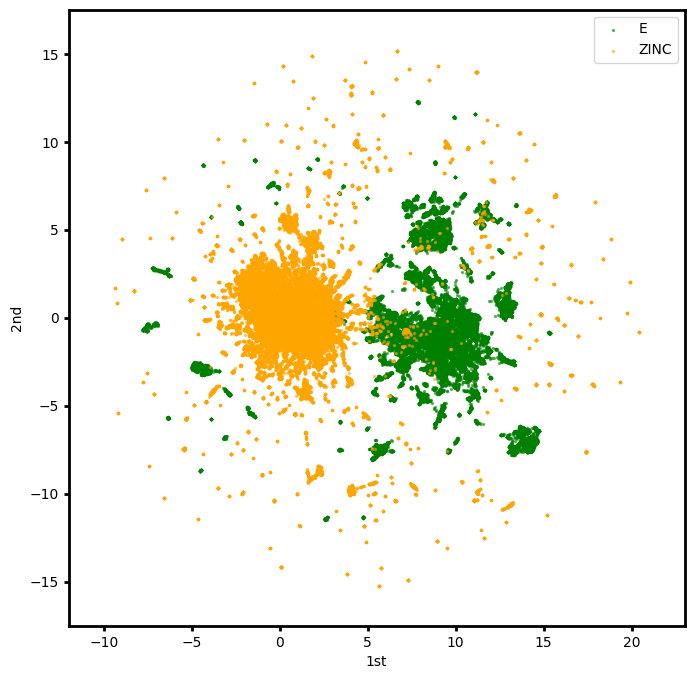

In [7]:
fig = plt.figure(figsize=(8,8))
plt.scatter(MF_umap_e['UMAP_0'], MF_umap_e['UMAP_1'], color='green', label='E', s=2, alpha=0.5)
plt.scatter(MF_umap_zinc['UMAP_0'], MF_umap_zinc['UMAP_1'], color='orange', label='ZINC', s=2, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-12, 23)
plt.ylim(-17.5, 17.5)
plt.gca().set_aspect('equal')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
plt.legend() 
plt.show()